# Phase_3_Project 

## Dataset: SyriaTel Customer Churn

# MODELLING

Import necessary libraries.

In [2344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import recall_score,precision_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import RocCurveDisplay

%matplotlib inline

In [2345]:
data_drop = pd.read_csv('Data/data_drop.csv')

In [2346]:
data_drop = data_drop.drop(data_drop.columns[0], axis=1)
data_drop.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Define independent features (X) and dependent target (y).

In [2347]:
X = data_drop.drop(columns='churn')
y = data_drop['churn']

Split dataset into training and testing set before fitting and transforming.

In [2348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

In [2349]:
print(X_train.shape, X_test.shape)

(2499, 17) (834, 17)


In [2350]:
X_train.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

Categorize features types before putting them into the pipeline.

In [2351]:
numeric_col = ['customer service calls','number vmail messages']
numeric_col_normal = ['account length','total day minutes', 'total day calls','total day charge',
                   'total eve minutes', 'total eve calls','total eve charge', 
                   'total night minutes', 'total night calls', 'total night charge', 
                   'total intl minutes', 'total intl calls','total intl charge'] 
ordinal_col = ['international plan','voice mail plan']
# norminal_col = ['area code']


Set up the pipeline for each feature type.

In [2352]:
numeric_pipeline = Pipeline([ ('minmaxscaler', MinMaxScaler())])
numeric_pipeline_normal = Pipeline([('standscaler', StandardScaler())])

ordinal_pipeline = Pipeline([
    ('ordenc', OrdinalEncoder()),
    ('standscaler', StandardScaler())])

In [2353]:
ct = ColumnTransformer(
    [("numpipe", numeric_pipeline, numeric_col), 
    ("numpipe_norm", numeric_pipeline_normal, numeric_col_normal), 
     ("ordipipe", ordinal_pipeline, ordinal_col)])

Fit & transform X_train, transform X_test

In [2354]:
X_train_transformed = pd.DataFrame(ct.fit_transform(X_train))
X_test_transformed = pd.DataFrame(ct.transform(X_test))

In [2355]:
pd.DataFrame(ct.fit_transform(X_train),columns = X_train.columns).head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,0.111111,0.000000,-1.404508,-1.883677,1.330852,-1.884170,1.037727,0.401340,1.037905,1.069609,0.004940,1.071757,2.768109,-0.595235,2.767357,-0.327448,-0.611418
1,0.222222,0.000000,0.366388,0.294083,0.529165,0.293703,0.516178,0.401340,0.517286,2.214376,0.670832,2.212569,1.051970,-1.417963,1.045965,-0.327448,-0.611418
2,0.444444,0.607843,0.518179,1.056392,-1.875896,1.056666,0.093407,0.849774,0.094283,-0.077125,-0.763398,-0.077797,-0.056369,0.227493,-0.053077,-0.327448,1.635543
3,0.111111,0.000000,2.010792,-0.679156,1.681590,-0.679320,-0.402459,0.650470,-0.403094,-0.322994,-0.660953,-0.322569,-0.056369,-0.183871,-0.053077,-0.327448,-0.611418
4,0.333333,0.000000,0.290493,0.484660,1.080325,0.484172,-0.718549,-0.296224,-0.719184,-1.186487,0.056162,-1.188013,0.837453,1.050221,0.834102,-0.327448,-0.611418


In [2356]:
ct

ColumnTransformer(transformers=[('numpipe',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['customer service calls',
                                  'number vmail messages']),
                                ('numpipe_norm',
                                 Pipeline(steps=[('standscaler',
                                                  StandardScaler())]),
                                 ['account length', 'total day minutes',
                                  'total day calls', 'total day charge',
                                  'total eve minutes', 'total eve calls',
                                  'total eve charge', 'total night minutes',
                                  'total night calls', 'total night charge',
                                  'total intl minutes', 'total intl calls',
                                  'total intl charge']),
                                ('ordipipe',
                                 Pipeline(steps=[('ordenc', OrdinalEncoder()),
                                                 ('standscaler',
                                                  StandardScaler())]),
                                 ['international plan', 'voice mail plan'])])

## 1. BASELINE

Since we are unsure about how each classifier performs on our dataset, we will apply all classifiers to compare their performance.

### 1.1. Baseline model 1: LogRegression model.

In [2357]:
logreg_pipe = Pipeline([('preprocess', ct),
                      ('logmodel',
                       LogisticRegression(random_state = 42, max_iter = 10000))])
logreg_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('logmodel',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [2358]:
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('logmodel',
                 LogisticRegression(max_iter=10000, random_state=42))])

#### Evaluate the baseline model with test dataset.

In [2359]:
y_pred_test_logreg = logreg_pipe.predict(X_test)

In [2360]:
confusion_matrix(y_test,y_pred_test_logreg)

array([[692,  17],
       [103,  22]])

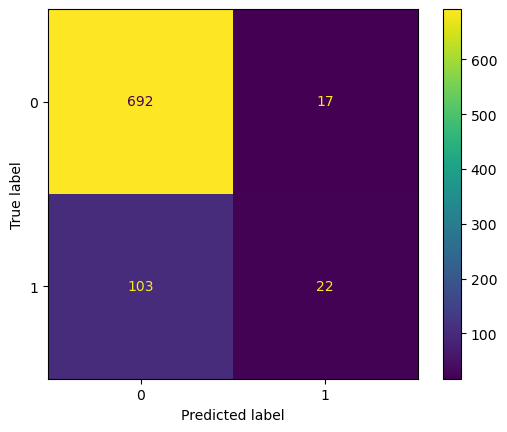

In [2361]:
ConfusionMatrixDisplay.from_estimator(logreg_pipe, X_test, y_test);

In [2362]:
report_test_logreg = classification_report(y_test, y_pred_test_logreg)
print(report_test_logreg)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       709
           1       0.56      0.18      0.27       125

    accuracy                           0.86       834
   macro avg       0.72      0.58      0.59       834
weighted avg       0.82      0.86      0.82       834



In [2363]:
accuracy_test_logreg = accuracy_score(y_test, y_pred_test_logreg)
accuracy_test_logreg

0.8561151079136691

In [2364]:
f1_score_test_logreg = f1_score(y_test, y_pred_test_logreg)
f1_score_test_logreg

0.2682926829268293

F1-score for LogisticRegression model is only 30%, which is quite low. So that let put it here first and proceed to try with another baseline model.

In [2365]:
y_prob = logreg_pipe.predict_proba(X_test)
y_prob[:,0].mean()

0.8596395430750391

In [2366]:
auc_score_logreg = roc_auc_score(y_test,y_pred_test_logreg)
auc_score_logreg

0.5760112834978843

In [2367]:
from sklearn.metrics import roc_curve

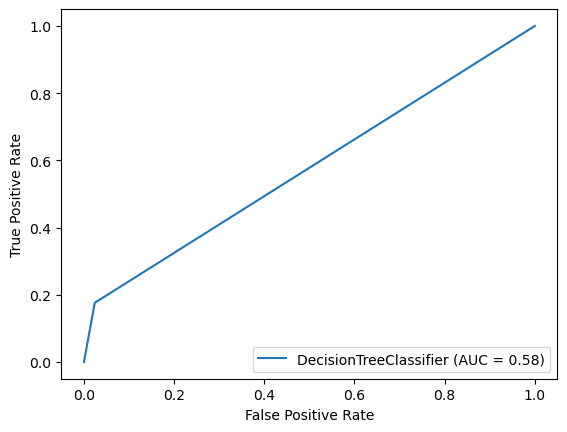

In [2368]:
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_test_logreg)
auc_score_logreg = metrics.auc(fpr_logreg, tpr_logreg)
display_dtree = metrics.RocCurveDisplay(fpr=fpr_logreg, tpr=tpr_logreg, roc_auc=auc_score_logreg,
                                   estimator_name='LogisticRegression')
display_logreg.plot()
plt.show()

In [2369]:

summary_table = pd.DataFrame({'Model': [], 'Classifier':[], 'Test_Accuracy' : [], 'Test_F1_score':[], 'AUC': []})

summary_table.loc[0] = ['Baseline_1', 'LogisticRegression', round(accuracy_test_logreg,2), round(f1_score_test_logreg,2)
                          , round(auc_score_logreg,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58


## 1.2. Baseline model 2: DecisionTreeClassifier.

Since the target is binary so that the DecisionTreeClassifier model would be utilized instead of DecisionTreeRegression.

In [2370]:
decisiontree_pipe = Pipeline([('preprocess', ct),
                      ('treemodel',DecisionTreeClassifier(random_state=42))])
decisiontree_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('treemodel', DecisionTreeClassifier(random_state=42))])

In [2371]:
decisiontree_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('treemodel', DecisionTreeClassifier(random_state=42))])

#### Evaluation the model with X_test

In [2372]:
y_pred_test_dtree = decisiontree_pipe.predict(X_test)

In [2373]:
report_test_dtree = classification_report(y_test, y_pred_test_dtree)
print(report_test_dtree)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       709
           1       0.68      0.72      0.70       125

    accuracy                           0.91       834
   macro avg       0.82      0.83      0.82       834
weighted avg       0.91      0.91      0.91       834



In [2374]:
confusion_matrix(y_test,y_pred_test_dtree)

array([[667,  42],
       [ 35,  90]])

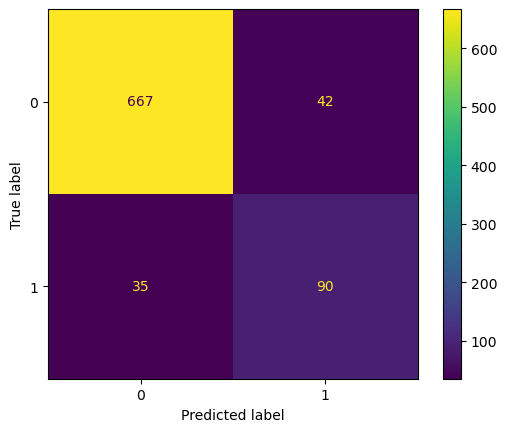

In [2375]:
ConfusionMatrixDisplay.from_estimator(decisiontree_pipe, X_test, y_test);

In [2376]:
accuracy_test_dtree = accuracy_score(y_test, y_pred_test_dtree)
accuracy_test_dtree

0.907673860911271

In [2377]:
f1_score_test_dtree = f1_score(y_test, y_pred_test_dtree)
f1_score_test_dtree

0.7003891050583657

In [2378]:
auc_score_dtree = roc_auc_score(y_test,y_pred_test_dtree)
auc_score_dtree

0.8303808180535965

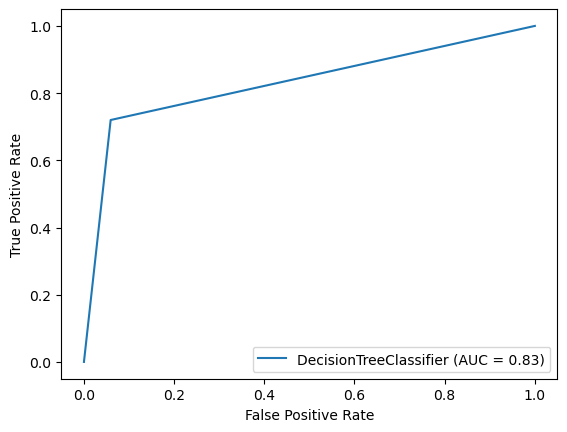

In [2379]:
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, y_pred_test_dtree)
auc_score_dtree = metrics.auc(fpr_dtree, tpr_dtree)
display_dtree = metrics.RocCurveDisplay(fpr=fpr_dtree, tpr=tpr_dtree, roc_auc=auc_score_dtree,
                                   estimator_name='DecisionTreeClassifier')
display_dtree.plot()
plt.show()

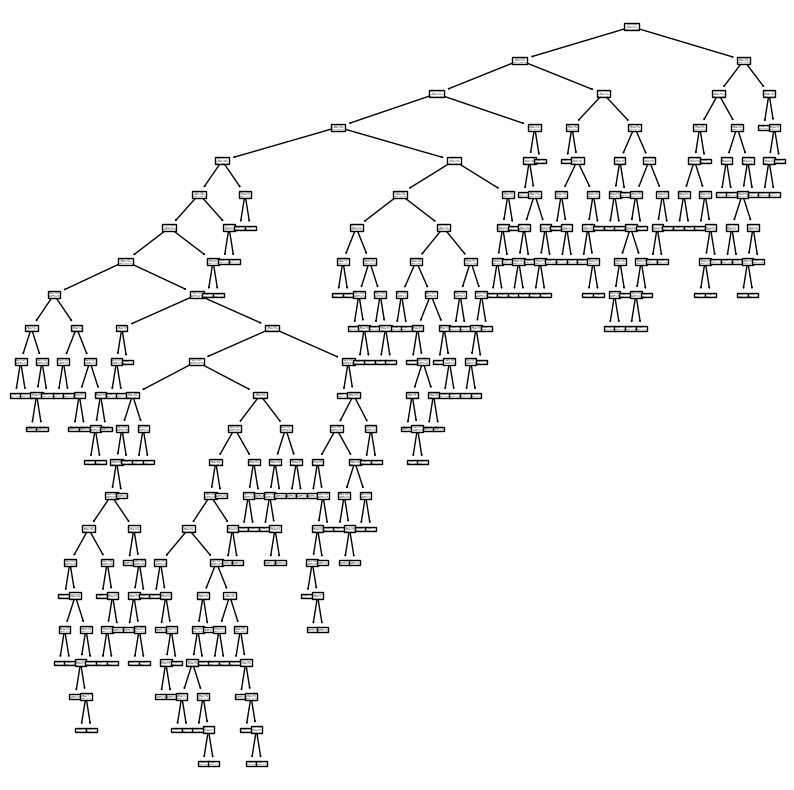

In [2380]:
f, ax = plt.subplots(figsize=(10, 10))
decision_tree = decisiontree_pipe.named_steps['treemodel']
plot_tree(decision_tree, ax=ax);


In [2381]:
max_depth = decision_tree.get_depth()
print(max_depth)

22


This model takes 22 depth to classify the data.

F1-score of decision tree is 71%, which is quite impressive and a good indicator.

In [2382]:
summary_table.loc[1] = ['Baseline_2', 'DecisionTreeClassifier', round(accuracy_test_dtree,2), round(f1_score_test_dtree,2)
                          , round(auc_score_dtree,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83


### 1.3. Baseline model 3: K Nearest Neighbors

In [2383]:
KNN_pipe = Pipeline([('preprocess', ct),
                      ('knnmodel', KNeighborsClassifier())])
KNN_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('knnmodel', KNeighborsClassifier())])

In [2384]:
KNN_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('knnmodel', KNeighborsClassifier())])

#### Evaluation the model with X_test

In [2385]:
y_pred_test_KNN = KNN_pipe.predict(X_test)

In [2386]:
confusion_matrix(y_test,y_pred_test_KNN)

array([[698,  11],
       [ 89,  36]])

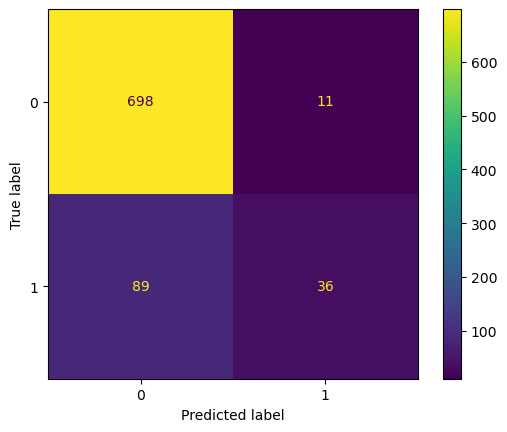

In [2387]:
ConfusionMatrixDisplay.from_estimator(KNN_pipe, X_test, y_test);

In [2388]:
report_test_KNN = classification_report(y_test, y_pred_test_KNN)
print(report_test_KNN)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       709
           1       0.77      0.29      0.42       125

    accuracy                           0.88       834
   macro avg       0.83      0.64      0.68       834
weighted avg       0.87      0.88      0.86       834



In [2389]:
accuracy_test_KNN = accuracy_score(y_test, y_pred_test_KNN)
accuracy_test_KNN

0.8800959232613909

In [2390]:
f1_score_test_KNN = f1_score(y_test, y_pred_test_KNN)
f1_score_test_KNN

0.41860465116279066

F1-score is 42%, which is quite good but not as high as of Decision Tree model.

In [2391]:
auc_score_KNN = roc_auc_score(y_test,y_pred_test_KNN)
auc_score_KNN

0.6362425952045134

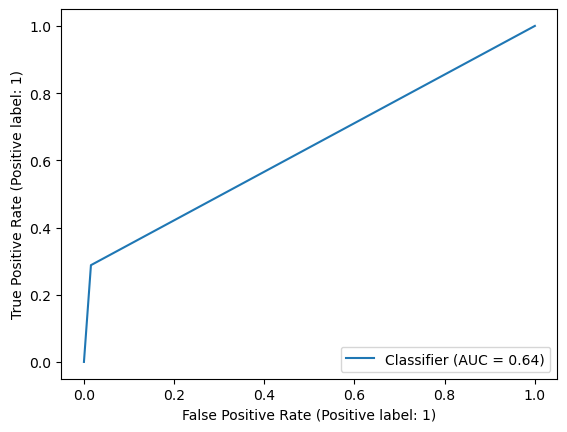

In [2392]:
RocCurveDisplay.from_predictions(y_test,y_pred_test_KNN);

In [2393]:
summary_table.loc[2] = ['Baseline_3', 'KNeighborsClassifier', round(accuracy_test_KNN,2), round(f1_score_test_KNN,2)
                          , round(auc_score_KNN,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83
2,Baseline_3,KNeighborsClassifier,0.88,0.42,0.64


### 1.4. Baseline model 4: RandomForest

Among 3 baseline model tested, DecisionTree model has the highest F1-score, which is 71%, so we can use DecisionTree modelthe final baseline and proceed to tune this model in the next step.

In [2273]:
rforest_pipe = Pipeline([('preprocess', ct),
                      ('rforestmodel',RandomForestClassifier(n_estimators = 100))])
rforest_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('rforestmodel', RandomForestClassifier())])

In [2274]:
rforest_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('rforestmodel', RandomForestClassifier())])

#### Evaluation

In [2275]:
y_pred_test_rforest = rforest_pipe.predict(X_test)

In [2276]:
confusion_matrix(y_test,y_pred_test_rforest)

array([[703,   6],
       [ 40,  85]])

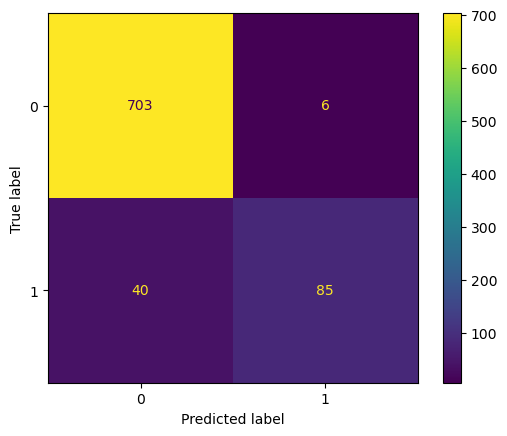

In [2277]:
ConfusionMatrixDisplay.from_estimator(rforest_pipe, X_test, y_test);

In [2278]:
report_test_rforest = classification_report(y_test, y_pred_test_rforest)
print(report_test_rforest)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       709
           1       0.93      0.68      0.79       125

    accuracy                           0.94       834
   macro avg       0.94      0.84      0.88       834
weighted avg       0.94      0.94      0.94       834



In [2279]:
f1_score_test_rforest = f1_score(y_test, y_pred_test_rforest)
f1_score_test_rforest

0.7870370370370372

In [2280]:
accuracy_test_rforest = accuracy_score(y_test, y_pred_test_forest)
accuracy_test_rforest

0.9448441247002398

In [2281]:
auc_score_rforest = roc_auc_score(y_test,y_pred_test_rforest)
auc_score_rforest

0.835768688293371

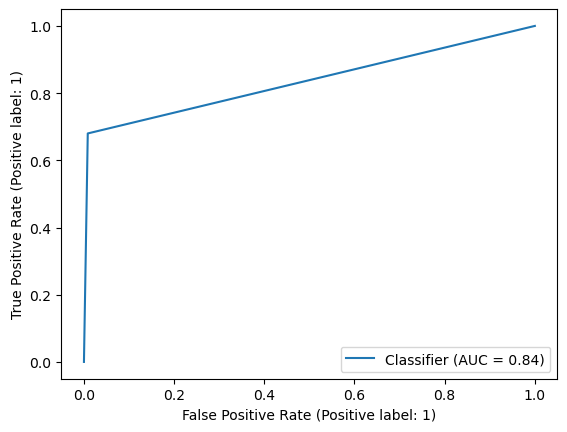

In [2282]:
RocCurveDisplay.from_predictions(y_test,y_pred_test_rforest);

In [2283]:
summary_table.loc[3] = ['Baseline_4', 'RandomForestClassifier', round(accuracy_test_rforest,2), round(f1_score_test_rforest,2)
                          , round(auc_score_rforest,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83
2,Baseline_3,KNeighborsClassifier,0.88,0.42,0.64
3,Baseline_4,RandomForestClassifier,0.94,0.79,0.84


In [2284]:
feat_imp_rforest = rforest_pipe['rforestmodel'].feature_importances_

feat_imp_rforest_series = pd.Series(feat_imp_rforest, 
          index = X_train.columns).sort_values(
    ascending = False)

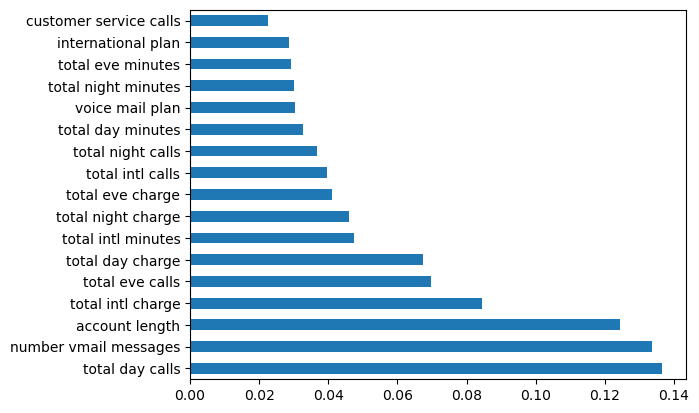

In [2285]:
feat_imp_rforest_series.plot(kind = 'barh');

### 1.5. Baseline model 5: XGBoosting

In [2286]:
XGBoost_pipe = Pipeline([('preprocess', ct),
                      ('XGBoostmodel',XGBClassifier())])
XGBoost_pipe


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve c...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [2287]:
XGBoost_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve c...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

#### Evaluation

In [2288]:
y_pred_test_XGboost = XGBoost_pipe.predict(X_test)

In [2289]:
confusion_matrix(y_test,y_pred_test_XGboost)

array([[702,   7],
       [ 32,  93]])

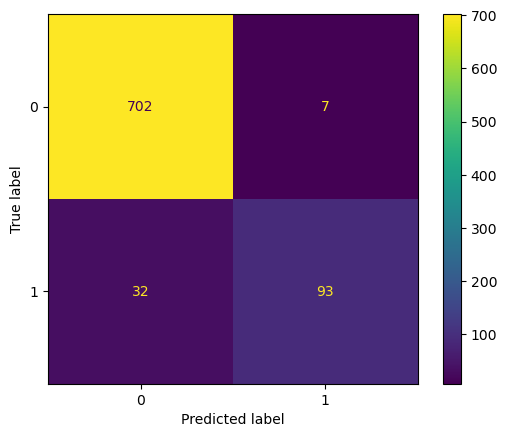

In [2290]:
ConfusionMatrixDisplay.from_estimator(XGBoost_pipe, X_test, y_test);

In [2291]:
report_test_XGboost = classification_report(y_test, y_pred_test_XGboost)
print(report_test_XGboost)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       709
           1       0.93      0.74      0.83       125

    accuracy                           0.95       834
   macro avg       0.94      0.87      0.90       834
weighted avg       0.95      0.95      0.95       834



In [2292]:
f1_score_test_XGboost = f1_score(y_test, y_pred_test_XGboost)
f1_score_test_XGboost

0.8266666666666667

In [2293]:
accuracy_test_XGBoost = accuracy_score(y_test, y_pred_test_XGboost)
accuracy_test_XGBoost

0.9532374100719424

In [2294]:
auc_score_XGBoost = roc_auc_score(y_test,y_pred_test_XGboost)
auc_score_XGBoost

0.8670634696755994

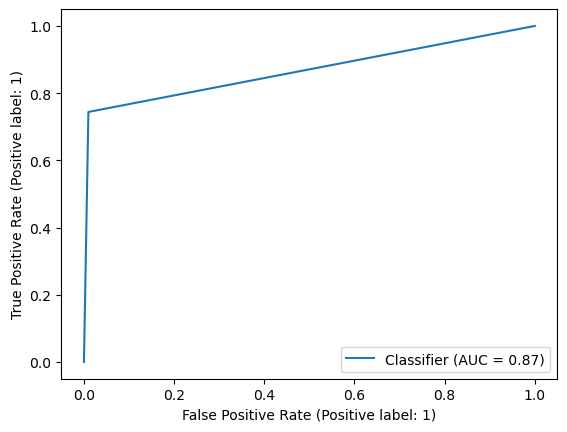

In [2295]:
RocCurveDisplay.from_predictions(y_test,y_pred_test_XGboost);

In [2296]:
summary_table.loc[4] = ['Baseline_5', 'XGBClassifier', round(accuracy_test_XGBoost,2), round(f1_score_test_XGBoost,2)
                          , round(auc_score_XGBoost,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83
2,Baseline_3,KNeighborsClassifier,0.88,0.42,0.64
3,Baseline_4,RandomForestClassifier,0.94,0.79,0.84
4,Baseline_5,XGBClassifier,0.95,0.81,0.87


In [2297]:
feat_imp_XGBoost = XGBoost_pipe['XGBoostmodel'].feature_importances_

feat_imp_XGBoost_series = pd.Series(feat_imp_XGBoost, 
          index = X_train.columns).sort_values(
    ascending = False)

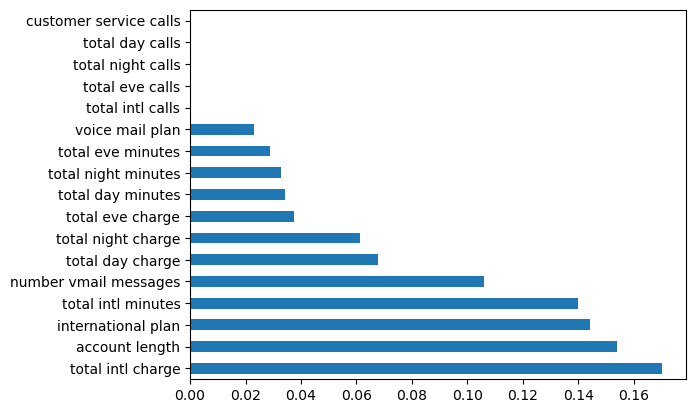

In [2298]:
feat_imp_XGBoost_series.plot(kind = 'barh');

## 2. MODEL TUNING

The upcoming steps will be model tuning, which is to improve the performance of each model above.

### 2.1. Model tuning with LogisticRegression:

In [2299]:
param_grid_logreg = {

    'logmodel__C': [0.001,0.01,0.1,1, 10,100,1000],
}

#### Baseline model conclusion: 

In [2300]:
tune_pipe_logreg = GridSearchCV(estimator=logreg_pipe, 
                       param_grid=param_grid_logreg,cv=5)


In [2301]:
tune_pipe_logreg.fit(X_train,y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['customer '
                                                                          'service '
                                                                          'calls',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages']),
                                                                        ('numpipe_norm',
                                                                         Pipeline(steps=[('standscaler',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'ch...
                                                                          'total '
                                                                          'night '
                                                                          'charge',
                                                                          'total '
                                                                          'intl '
                                                                          'minutes',
                                                                          'total '
                                                                          'intl '
                                                                          'calls',
                                                                          'total '
                                                                          'intl '
                                                                          'charge']),
                                                                        ('ordipipe',
                                                                         Pipeline(steps=[('ordenc',
                                                                                          OrdinalEncoder()),
                                                                                         ('standscaler',
                                                                                          StandardScaler())]),
                                                                         ['international '
                                                                          'plan',
                                                                          'voice '
                                                                          'mail '
                                                         

In [2302]:
tune_pipe_logreg.best_params_

{'logmodel__C': 1}

In [2303]:
tune_pipe_logreg.best_score_

0.8631438877755511

In [2304]:
best_model_logreg = tune_pipe_logreg.best_estimator_
best_model_logreg

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('logmodel',
                 LogisticRegression(C=1, max_iter=10000, random_state=42))])

#### Evaluate model with X_test

In [2305]:
y_pred_logreg_tune = best_model_logreg_tune.predict(X_test)

In [2306]:
confusion_matrix(y_test,y_pred_logreg_tune)

array([[692,  17],
       [103,  22]])

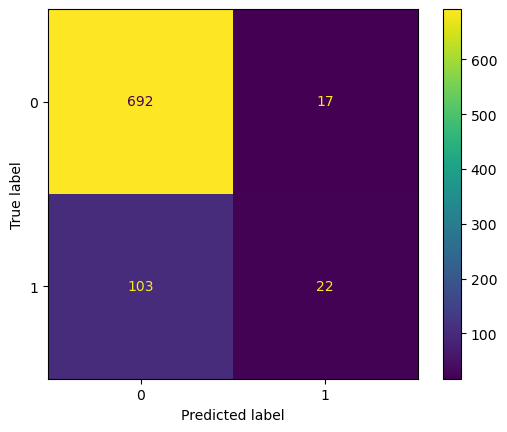

In [2307]:
ConfusionMatrixDisplay.from_estimator(best_model_logreg, X_test, y_test);

In [2308]:
logreg_result_df = pd.DataFrame(tune_pipe_logreg.cv_results_)
logreg_result_df = logreg_result_df.sort_values(by = 'rank_test_score')
logreg_result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logmodel__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.008107,0.000848,0.001825,0.000102,1,{'logmodel__C': 1},0.866,0.880,0.858,0.852,0.859719,0.863144,0.009536,1
1,0.006714,0.000389,0.001945,0.000240,0.01,{'logmodel__C': 0.01},0.872,0.872,0.850,0.852,0.867735,0.862747,0.009738,2
4,0.010785,0.001447,0.002022,0.000191,10,{'logmodel__C': 10},0.860,0.876,0.858,0.854,0.861723,0.861945,0.007484,3
5,0.012779,0.000749,0.001751,0.000071,100,{'logmodel__C': 100},0.856,0.876,0.860,0.854,0.861723,0.861545,0.007734,4
2,0.007260,0.000154,0.001862,0.000268,0.1,{'logmodel__C': 0.1},0.862,0.876,0.848,0.852,0.867735,0.861147,0.010210,5


In [2309]:
print(classification_report(y_test, y_pred_logreg_tune))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       709
           1       0.56      0.18      0.27       125

    accuracy                           0.86       834
   macro avg       0.72      0.58      0.59       834
weighted avg       0.82      0.86      0.82       834



In [2310]:
f1_score_logreg_tune = f1_score(y_test, y_pred_logreg_tune)
f1_score_logreg_tune

0.2682926829268293

In [2311]:
accuracy_logreg_tune = accuracy_score(y_test, y_pred_logreg_tune)
accuracy_logreg_tune

0.8561151079136691

In [2312]:
auc_score_XGBoost_tune = roc_auc_score(y_test,y_pred_logreg_tune)
auc_score_XGBoost_tune 

0.5760112834978843

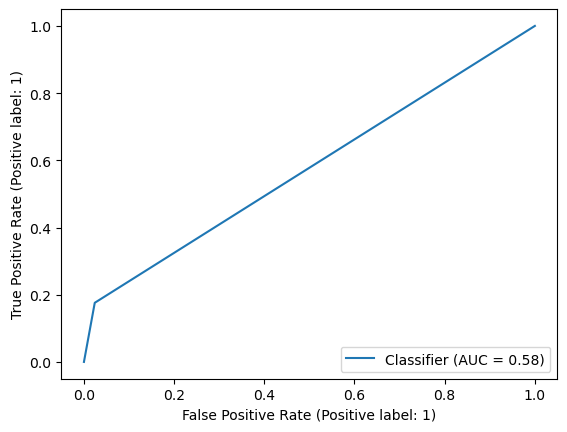

In [2313]:
RocCurveDisplay.from_predictions(y_test,y_pred_logreg_tune);

In [2314]:
summary_table.loc[5] = ['Baseline_1 + Tuning ', 'LogisticRegression + Tuning', round(accuracy_logreg_tune,2), round(f1_score_logreg_tune,2)
                          , round(auc_score_XGBoost_tune,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83
2,Baseline_3,KNeighborsClassifier,0.88,0.42,0.64
3,Baseline_4,RandomForestClassifier,0.94,0.79,0.84
4,Baseline_5,XGBClassifier,0.95,0.81,0.87
5,Baseline_1 + Tuning,LogisticRegression + Tuning,0.86,0.27,0.58


After tuning with C hyperparameter, the best model C is 1, which is not different from the baseline model, hence the accuracy, f1-score and AUC remain unchanged.

### 2.2. Model tuning with DecisionTreeClassifier:

Tune model with: criteria, max_depth, min_samples_split and min_samples_leaf.

In [2315]:
param_grid_dtree = {
    'treemodel__criterion': ['gini', 'entropy'],
    'treemodel__max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,30],
    'treemodel__min_samples_split': np.arange(2,11,1),
    'treemodel__min_samples_leaf': np.arange(2,11,1)
}

In [2316]:
tune_pipe_dtree = GridSearchCV(estimator=decisiontree_pipe, 
                       param_grid=param_grid_dtree,cv=5)

In [2317]:
a = range(2,10)
a

range(2, 10)

In [2318]:
tune_pipe_dtree.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['customer '
                                                                          'service '
                                                                          'calls',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages']),
                                                                        ('numpipe_norm',
                                                                         Pipeline(steps=[('standscaler',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'ch...
                                                                         ['international '
                                                                          'plan',
                                                                          'voice '
                                                                          'mail '
                                                                          'plan'])])),
                                       ('treemodel',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'treemodel__criterion': ['gini', 'entropy'],
                         'treemodel__max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                  12, 13, 14, 15, 16, 17, 18,
                                                  19, 20, 21, 30],
                         'treemodel__min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'treemodel__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [2319]:
tune_pipe_dtree.best_params_

{'treemodel__criterion': 'gini',
 'treemodel__max_depth': 6,
 'treemodel__min_samples_leaf': 2,
 'treemodel__min_samples_split': 7}

In [2320]:
tune_pipe_dtree.best_score_

0.9455831663326653

In [2321]:
best_model_dtree_tune = tune_pipe_dtree.best_estimator_
best_model_dtree_tune

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve c...
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('treemodel',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=2,
                                        min_samples_split=7,
                                        random_state=42))])

#### Evaluate model with X_test

In [2322]:
y_pred_dtree_tune = best_model_dtree_tune.predict(X_test)

In [2323]:
confusion_matrix(y_test,y_pred_dtree_tune)

array([[701,   8],
       [ 35,  90]])

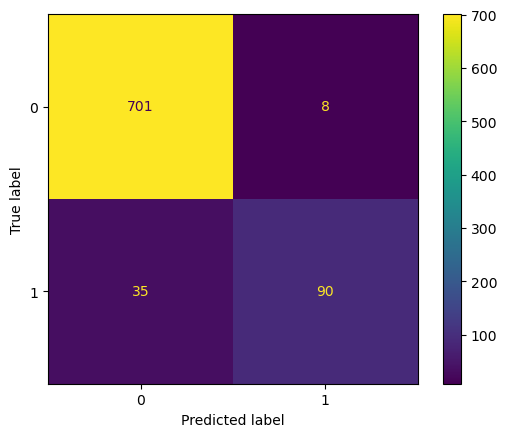

In [2324]:
ConfusionMatrixDisplay.from_estimator(best_model_dtree_tune, X_test, y_test);

In [2325]:
print(classification_report(y_test, y_pred_dtree_tune))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       709
           1       0.92      0.72      0.81       125

    accuracy                           0.95       834
   macro avg       0.94      0.85      0.89       834
weighted avg       0.95      0.95      0.95       834



In [2326]:
f1_score_test_dtree_tune = f1_score(y_test, y_pred_dtree_tune)
f1_score_test_dtree_tune

0.8071748878923766

In [2327]:
accuracy_dtree_tune = accuracy_score(y_test, y_pred_dtree_tune)
accuracy_dtree_tune

0.9484412470023981

In [2328]:
auc_score_dtree_tune = roc_auc_score(y_test,y_pred_dtree_tune)
auc_score_dtree_tune

0.8543582510578279

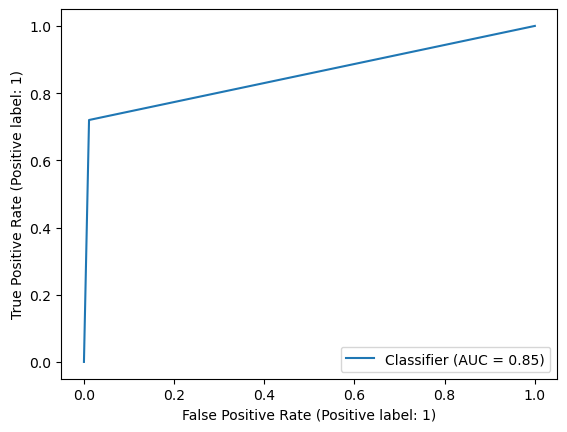

In [2329]:
RocCurveDisplay.from_predictions(y_test,y_pred_dtree_tune);

Comparing the accuracy between model of tune2_pipe & model of tune1_pipe,  model of tune2_pipe seems to perform better regarding accuracy (0.942 vs 0.938), however, f1-score of the model of tune1_pipe is better (0.776 vs 0.759). So that, model of tune1_pipe will be kept to work on for further tuning.

In [2330]:
summary_table.loc[6] = ['Baseline_2 + Tuning ', 'DecisionTreeClassifier + Tuning', round(accuracy_dtree_tune,2), round(f1_score_test_dtree_tune,2)
                          , round(auc_score_dtree_tune,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83
2,Baseline_3,KNeighborsClassifier,0.88,0.42,0.64
3,Baseline_4,RandomForestClassifier,0.94,0.79,0.84
4,Baseline_5,XGBClassifier,0.95,0.81,0.87
5,Baseline_1 + Tuning,LogisticRegression + Tuning,0.86,0.27,0.58
6,Baseline_2 + Tuning,DecisionTreeClassifier + Tuning,0.95,0.81,0.85


Comparing with the baseline, the model accuracy, f1-score and AUC increases by 4%, 11% and 2% respectively.

### 2.3. Model tuning with KNN:

In [1919]:
param_grid_KNN = {
    'knnmodel__n_neighbors': np.arange(3,20,1),
    'knnmodel__p': [1,2,3,4],
    'knnmodel__weights': ['uniform','distance'],
    'knnmodel__leaf_size': np.arange(5,40,5)
}

In [1833]:
tune_knn = GridSearchCV(estimator=KNN_pipe, 
                       param_grid=param_grid_KNN,cv=5)

In [1834]:
tune_knn.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['customer '
                                                                          'service '
                                                                          'calls',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages']),
                                                                        ('numpipe_norm',
                                                                         Pipeline(steps=[('standscaler',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'ch...
                                                                         Pipeline(steps=[('ordenc',
                                                                                          OrdinalEncoder()),
                                                                                         ('standscaler',
                                                                                          StandardScaler())]),
                                                                         ['international '
                                                                          'plan',
                                                                          'voice '
                                                                          'mail '
                                                                          'plan'])])),
                                       ('knnmodel', KNeighborsClassifier())]),
             param_grid={'knnmodel__leaf_size': array([ 5, 10, 15, 20, 25, 30, 35]),
                         'knnmodel__n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'knnmodel__p': [1, 2, 3, 4],
                         'knnmodel__weights': ['uniform', 'distance']})

In [1835]:
tune_knn.best_params_

{'knnmodel__leaf_size': 5,
 'knnmodel__n_neighbors': 8,
 'knnmodel__p': 1,
 'knnmodel__weights': 'distance'}

In [1836]:
tune_knn.best_score_

0.8895575150300601

In [1837]:
best_model_knn = tune_knn.best_estimator_
best_model_knn

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('knnmodel',
                 KNeighborsClassifier(leaf_size=5, n_neighbors=8, p=1,
                                      weights='distance'))])

#### Evaluate the model with X_test

In [1838]:
y_pred_knn_tune = best_model_knn.predict(X_test)

In [1839]:
confusion_matrix(y_test,y_pred_knn_tune)

array([[704,   5],
       [ 90,  35]])

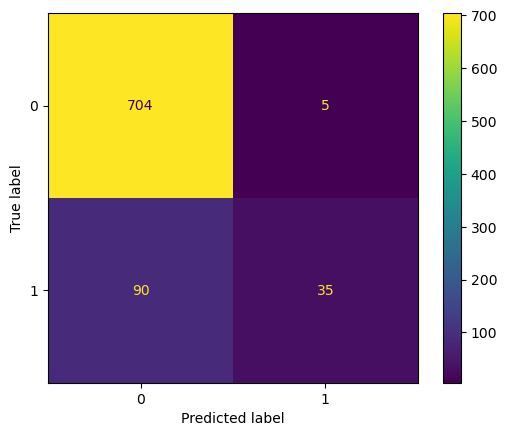

In [1840]:
ConfusionMatrixDisplay.from_estimator(best_model_knn, X_test, y_test);

In [1841]:
print(classification_report(y_test, y_pred_knn_tune))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       709
           1       0.88      0.28      0.42       125

    accuracy                           0.89       834
   macro avg       0.88      0.64      0.68       834
weighted avg       0.88      0.89      0.86       834



In [1842]:
f1_score_knn_tune = f1_score(y_test, y_pred_knn_tune)
f1_score_knn_tune

0.42424242424242425

In [1843]:
accuracy_knn_tune = accuracy_score(y_test, y_pred_knn_tune)
accuracy_knn_tune

0.8860911270983214

In [1844]:
auc_score_knn_tune = roc_auc_score(y_test,y_pred_knn_tune)
auc_score_knn_tune

0.6364739069111425

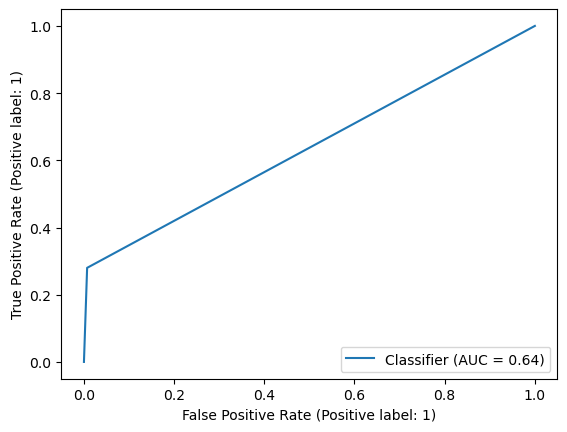

In [1845]:
RocCurveDisplay.from_predictions(y_test,y_pred_knn_tune);

In [1846]:
summary_table.loc[7] = ['Baseline_3 + Tuning ', 'KNeighborsClassifier + Tuning', round(accuracy_knn_tune,2), round(f1_score_knn_tune,2)
                          , round(auc_score_knn_tune,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83
2,Baseline_3,KNeighborsClassifier,0.88,0.42,0.64
3,Baseline_4,RandomForestClassifier,0.94,0.83,0.86
4,Baseline_5,XGBClassifier,0.95,0.81,0.87
5,Baseline_1 + Tuning,LogisticRegression + Tuning,0.86,0.27,0.58
6,Baseline_2 + Tuning,DecisionTreeClassifier + Tuning,0.95,0.81,0.85
7,Baseline_3 + Tuning,KNeighborsClassifier + Tuning,0.89,0.42,0.64


After tuning, the model accuracy increases around 1% while f1-score and AUC remained unchanged, which suggests that target class might have imbalance issue.

### 2.4. Model tuning with RandomForestClassifier

In [170]:
a = RandomForestClassifier()

In [1847]:
param_grid_rforest = {
    'forestmodel__criterion': ['gini','entropy'],
    'forestmodel__max_depth': np.arange(3,11,1),
    'forestmodel__min_samples_split': np.arange(3,11,1)
}

In [1848]:
tune_rforest = GridSearchCV(estimator=forest_pipe, 
                       param_grid=param_grid_rforest,cv=5)

In [1849]:
tune_rforest.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['customer '
                                                                          'service '
                                                                          'calls',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages']),
                                                                        ('numpipe_norm',
                                                                         Pipeline(steps=[('standscaler',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'ch...
                                                                          'charge']),
                                                                        ('ordipipe',
                                                                         Pipeline(steps=[('ordenc',
                                                                                          OrdinalEncoder()),
                                                                                         ('standscaler',
                                                                                          StandardScaler())]),
                                                                         ['international '
                                                                          'plan',
                                                                          'voice '
                                                                          'mail '
                                                                          'plan'])])),
                                       ('forestmodel',
                                        RandomForestClassifier())]),
             param_grid={'forestmodel__criterion': ['gini', 'entropy'],
                         'forestmodel__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                         'forestmodel__min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10])})

In [1850]:
tune_rforest.best_params_

{'forestmodel__criterion': 'gini',
 'forestmodel__max_depth': 10,
 'forestmodel__min_samples_split': 4}

In [1851]:
tune_rforest.best_score_

0.9515847695390782

In [1852]:
best_model_rforest = tune_rforest.best_estimator_
best_model_rforest

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('forestmodel',
                 RandomForestClassifier(max_depth=10, min_samples_split=4))])

#### Evaluate the model with X_test

In [1853]:
y_pred_rforest_tune = best_model_rforest.predict(X_test)

In [1854]:
confusion_matrix(y_test,y_pred_rforest_tune)

array([[704,   5],
       [ 41,  84]])

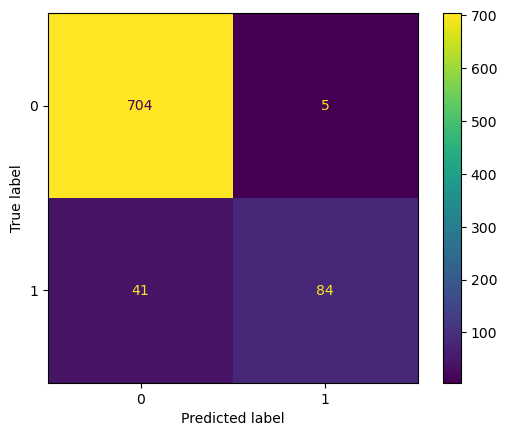

In [1855]:
ConfusionMatrixDisplay.from_estimator(best_model_rforest, X_test, y_test);

In [1856]:
print(classification_report(y_test, y_pred_rforest_tune))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       709
           1       0.94      0.67      0.79       125

    accuracy                           0.94       834
   macro avg       0.94      0.83      0.88       834
weighted avg       0.94      0.94      0.94       834



In [1857]:
f1_score_rforest_tune = f1_score(y_test, y_pred_rforest_tune)
f1_score_rforest_tune

0.7850467289719626

In [1858]:
accuracy_rforest_tune = accuracy_score(y_test, y_pred_rforest_tune)
accuracy_rforest_tune

0.9448441247002398

In [1859]:
auc_score_rforest_tune = roc_auc_score(y_test,y_pred_rforest_tune)
auc_score_rforest_tune

0.8324739069111425

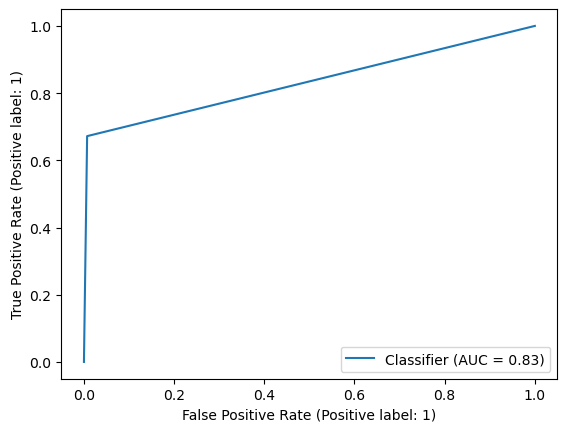

In [1860]:
RocCurveDisplay.from_predictions(y_test,y_pred_rforest_tune);

In [1861]:
feat_imp_rforest = best_model_rforest['forestmodel'].feature_importances_

feat_imp_rforest_series = pd.Series(feat_imp_rforest, 
          index = X_train.columns).sort_values(
    ascending = False)

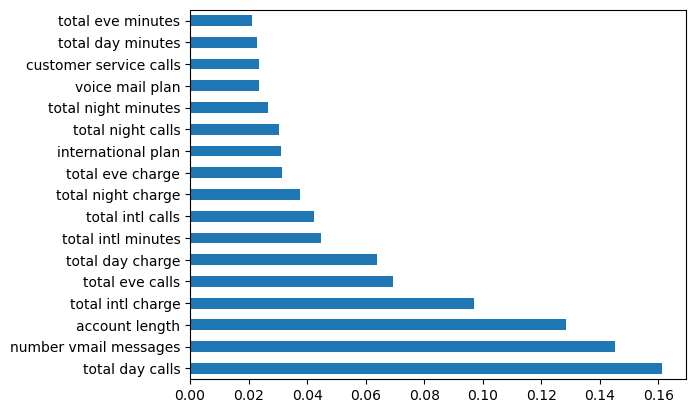

In [1862]:
feat_imp_rforest_series.plot(kind = 'barh');

In [1863]:
summary_table.loc[8] = ['Baseline_4 + Tuning ', 'RandomForestClassifier + Tuning', round(accuracy_rforest_tune,2), round(f1_score_rforest_tune,2)
                          , round(auc_score_rforest_tune,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83
2,Baseline_3,KNeighborsClassifier,0.88,0.42,0.64
3,Baseline_4,RandomForestClassifier,0.94,0.83,0.86
4,Baseline_5,XGBClassifier,0.95,0.81,0.87
5,Baseline_1 + Tuning,LogisticRegression + Tuning,0.86,0.27,0.58
6,Baseline_2 + Tuning,DecisionTreeClassifier + Tuning,0.95,0.81,0.85
7,Baseline_3 + Tuning,KNeighborsClassifier + Tuning,0.89,0.42,0.64
8,Baseline_4 + Tuning,RandomForestClassifier + Tuning,0.94,0.79,0.83


### 2.5. Model tuning with XGBoosting

In [1864]:
param_grid_XGBoost = {
    'XGBoostmodel__n_estimators': [100,500],
    'XGBoostmodel__max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
    'XGBoostmodel__learning_rate': [0.001,0.01,0.05,0.1,0.15,0.2,0.3],
    'XGBoostmodel__gamma': [0,5,10,20,50],
    'XGBoostmodel__colsample_bytree': [.5,0.6,0.7,0.8,],
    
}

In [1865]:
tune_XGBoost = GridSearchCV(estimator=XGBoost_pipe, 
                       param_grid=param_grid_XGBoost,cv=5)

In [1866]:
tune_XGBoost.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['customer '
                                                                          'service '
                                                                          'calls',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages']),
                                                                        ('numpipe_norm',
                                                                         Pipeline(steps=[('standscaler',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'ch...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'XGBoostmodel__colsample_bytree': [0.5, 0.6, 0.7, 0.8],
                         'XGBoostmodel__gamma': [0, 5, 10, 20, 50],
                         'XGBoostmodel__learning_rate': [0.001, 0.01, 0.05, 0.1,
                                                         0.15, 0.2, 0.3],
                         'XGBoostmodel__max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                     11],
                         'XGBoostmodel__n_estimators': [100, 500]})

In [1867]:
tune_XGBoost.best_params_

{'XGBoostmodel__colsample_bytree': 0.7,
 'XGBoostmodel__gamma': 5,
 'XGBoostmodel__learning_rate': 0.1,
 'XGBoostmodel__max_depth': 7,
 'XGBoostmodel__n_estimators': 500}

In [1868]:
tune_XGBoost.best_score_

0.9591871743486973

In [1869]:
best_model_XGBoost = tune_XGBoost.best_estimator_
best_model_XGBoost

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve c...
                               feature_types=None, gamma=5, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=500,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

#### Evaluate the model with X_test

In [1870]:
y_pred_XGBoost_tune = best_model_XGBoost.predict(X_test)

In [1871]:
confusion_matrix(y_test,y_pred_XGBoost_tune)

array([[702,   7],
       [ 34,  91]])

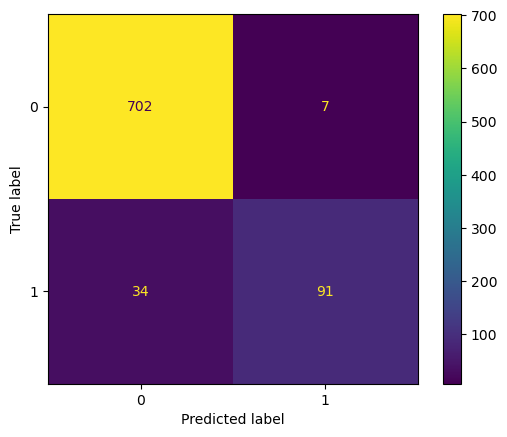

In [1872]:
ConfusionMatrixDisplay.from_estimator(best_model_XGBoost, X_test, y_test);

In [1873]:
print(classification_report(y_test, y_pred_XGBoost_tune))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       709
           1       0.93      0.73      0.82       125

    accuracy                           0.95       834
   macro avg       0.94      0.86      0.89       834
weighted avg       0.95      0.95      0.95       834



In [1874]:
f1_score_XGBoost_tune = f1_score(y_test, y_pred_XGBoost_tune)
f1_score_XGBoost_tune

0.8161434977578476

In [1875]:
accuracy_XGBoost_tune = accuracy_score(y_test, y_pred_XGBoost_tune)
accuracy_XGBoost_tune

0.9508393285371702

In [1876]:
auc_score_XGBoost_tune = roc_auc_score(y_test,y_pred_XGBoost_tune)
auc_score_XGBoost_tune

0.8590634696755994

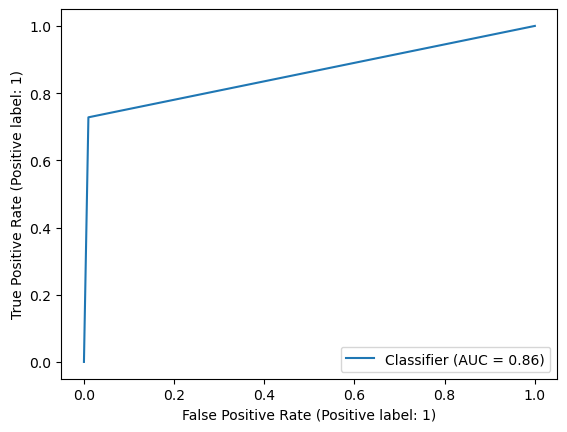

In [1877]:
RocCurveDisplay.from_predictions(y_test,y_pred_XGBoost_tune);

In [1878]:
feat_imp_XGBoost = best_model_XGBoost['XGBoostmodel'].feature_importances_

feat_imp_XGBoost_series = pd.Series(feat_imp_XGBoost, 
          index = X_train.columns).sort_values(
    ascending = False)

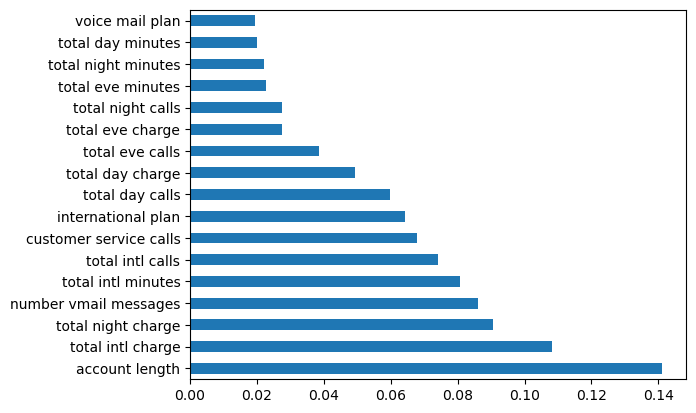

In [1879]:
feat_imp_XGBoost_series.plot(kind = 'barh');

In [1880]:
summary_table.loc[9] = ['Baseline_5 + Tuning ', 'XGBClassifier + Tuning', round(accuracy_XGBoost_tune,2), round(f1_score_XGBoost_tune,2)
                          , round(auc_score_XGBoost_tune,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83
2,Baseline_3,KNeighborsClassifier,0.88,0.42,0.64
3,Baseline_4,RandomForestClassifier,0.94,0.83,0.86
4,Baseline_5,XGBClassifier,0.95,0.81,0.87
5,Baseline_1 + Tuning,LogisticRegression + Tuning,0.86,0.27,0.58
6,Baseline_2 + Tuning,DecisionTreeClassifier + Tuning,0.95,0.81,0.85
7,Baseline_3 + Tuning,KNeighborsClassifier + Tuning,0.89,0.42,0.64
8,Baseline_4 + Tuning,RandomForestClassifier + Tuning,0.94,0.79,0.83
9,Baseline_5 + Tuning,XGBClassifier + Tuning,0.95,0.82,0.86


## 3. MODEL TUNING WITH SMOTE

Recall the weight of class 0 and 1 in the dataset, in which class 0 always gets more than 85% accurate even with naive classifier and this causes the class imbalance problem. The following will use SMOTE technique to deal with this problem to see how the model can improve performance.

In [1881]:
a = DecisionTreeClassifier()

In [1882]:
print(data_drop['churn'].value_counts())
print('------')
print(data_drop['churn'].value_counts(normalize=True))

churn
0    2850
1     483
Name: count, dtype: int64
------
churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64


### 3.1. LogisticRegression classifier + SMOTE

In [1883]:
d = SMOTE()

In [1884]:
logreg_pipe_SMOTE = Pipeline([
    ('preprocess', ct),       
    ('smote', SMOTE(random_state = 42)),
    ('logmodel', LogisticRegression(random_state = 42, max_iter = 10000))])

param_grid_logreg_SMOTE = {
    'logmodel__C': [0.001,0.01,0.1,1,10,100,1000],
    'smote__sampling_strategy': np.arange(0.2,0.8,0.05)
}


In [1885]:
tune_logreg_SMOTE = GridSearchCV(estimator=logreg_pipe_SMOTE, param_grid = param_grid_logreg_SMOTE , cv = 5)

In [1886]:
tune_logreg_SMOTE.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['customer '
                                                                          'service '
                                                                          'calls',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages']),
                                                                        ('numpipe_norm',
                                                                         Pipeline(steps=[('standscaler',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'ch...
                                                                                          OrdinalEncoder()),
                                                                                         ('standscaler',
                                                                                          StandardScaler())]),
                                                                         ['international '
                                                                          'plan',
                                                                          'voice '
                                                                          'mail '
                                                                          'plan'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('logmodel',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42))]),
             param_grid={'logmodel__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'smote__sampling_strategy': array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ,
       0.75, 0.8 ])})

In [1887]:
tune_logreg_SMOTE.best_params_

{'logmodel__C': 0.001, 'smote__sampling_strategy': 0.7}

In [1888]:
tune_logreg_SMOTE.best_score_

0.8707438877755511

In [1889]:
best_model_logreg_SMOTE = tune_logreg_SMOTE.best_estimator_
best_model_logreg_SMOTE

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve c...
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('logmodel',
                 LogisticRegression(C=0.001, max_iter=10000, random_state=42))])

#### Evaluation the model with X_test

In [1890]:
y_pred_logreg_SMOTE = best_model_logreg_SMOTE.predict(X_test)

In [1891]:
confusion_matrix(y_test,y_pred_logreg_SMOTE)

array([[668,  41],
       [ 65,  60]])

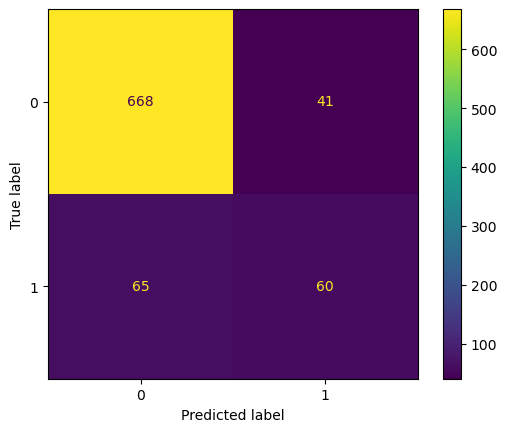

In [1892]:
ConfusionMatrixDisplay.from_estimator(best_model_logreg_SMOTE, X_test, y_test);

In [1893]:
print(classification_report(y_test, y_pred_logreg_SMOTE))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       709
           1       0.59      0.48      0.53       125

    accuracy                           0.87       834
   macro avg       0.75      0.71      0.73       834
weighted avg       0.86      0.87      0.87       834



In [1894]:
f1_score_log_SMOTE = f1_score(y_test, y_pred_logreg_SMOTE)
f1_score_log_SMOTE

0.5309734513274336

In [1895]:
accuracy_log_SMOTE = accuracy_score(y_test, y_pred_logreg_SMOTE)
accuracy_log_SMOTE

0.8729016786570744

In [1896]:
auc_score_log_SMOTE = roc_auc_score(y_test,y_pred_logreg_SMOTE)
auc_score_log_SMOTE

0.711086036671368

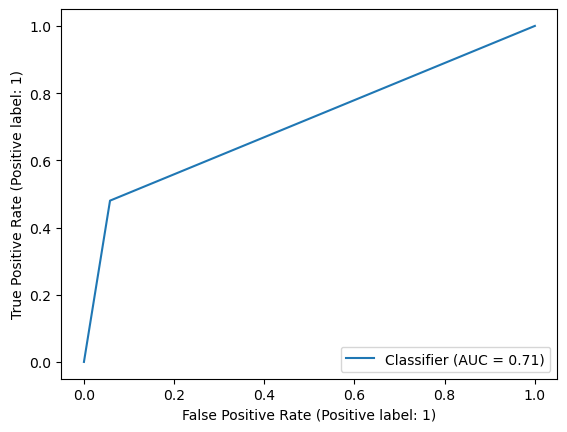

In [1897]:
RocCurveDisplay.from_predictions(y_test,y_pred_logreg_SMOTE);

In [1898]:
summary_table.loc[10] = ['Baseline_1 + Tuning + SMOTE ', 'LogisticRegression + Tuning + SMOTE', round(accuracy_log_SMOTE,2), round(f1_score_log_SMOTE,2)
                          , round(auc_score_log_SMOTE,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83
2,Baseline_3,KNeighborsClassifier,0.88,0.42,0.64
3,Baseline_4,RandomForestClassifier,0.94,0.83,0.86
4,Baseline_5,XGBClassifier,0.95,0.81,0.87
5,Baseline_1 + Tuning,LogisticRegression + Tuning,0.86,0.27,0.58
6,Baseline_2 + Tuning,DecisionTreeClassifier + Tuning,0.95,0.81,0.85
7,Baseline_3 + Tuning,KNeighborsClassifier + Tuning,0.89,0.42,0.64
8,Baseline_4 + Tuning,RandomForestClassifier + Tuning,0.94,0.79,0.83
9,Baseline_5 + Tuning,XGBClassifier + Tuning,0.95,0.82,0.86


In [1899]:
best_model_logreg_SMOTE.named_steps['logmodel'].coef_[0]

array([ 0.09213823, -0.0304748 ,  0.01998464,  0.14668166,  0.0159941 ,
        0.14668497,  0.0739081 ,  0.02170781,  0.07389317,  0.020727  ,
        0.01971061,  0.02069119,  0.06348063, -0.10840684,  0.06356054,
        0.26696618, -0.1361364 ])

In [1900]:
coefficients_logreg_SMOTE = best_model_logreg_SMOTE.named_steps['logmodel'].coef_[0]
feat_imp_logreg_SMOTE_series = pd.Series(coefficients_logreg_SMOTE, index=X_train.columns).sort_values(ascending=False)

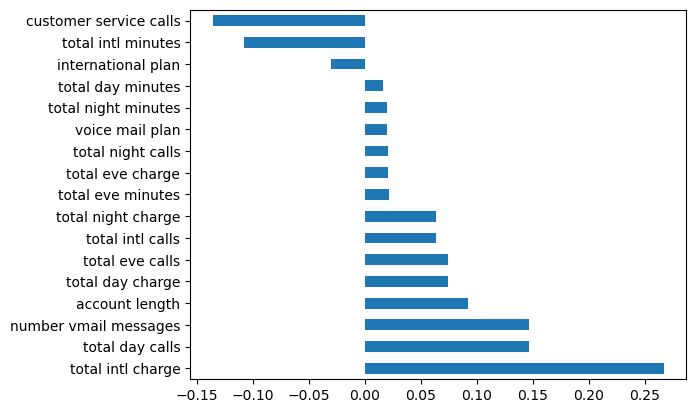

In [1901]:
feat_imp_logreg_SMOTE_series.plot(kind = 'barh');

### 3.2. DecisionTreeClassifier model + SMOTE

In [1902]:
dtree_pipe_SMOTE = Pipeline([
    ('preprocess', ct),       
    ('smote', SMOTE(random_state = 42)),
    ('treemodel',DecisionTreeClassifier(random_state=42))])

param_grid_dtree_SMOTE = {
    'treemodel__criterion': ['gini'],
    'treemodel__max_depth': np.arange(3,11,1),
    'treemodel__min_samples_leaf': np.arange(3,11,1),
    'treemodel__min_samples_split': np.arange(3,11,1),
    'smote__sampling_strategy': np.arange(0.2,0.5,0.01)
    
}


In [1903]:
tune_dtree_SMOTE = GridSearchCV(estimator=dtree_pipe_SMOTE, param_grid = param_grid_dtree_SMOTE , cv = 5)

In [1904]:
tune_dtree_SMOTE.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['customer '
                                                                          'service '
                                                                          'calls',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages']),
                                                                        ('numpipe_norm',
                                                                         Pipeline(steps=[('standscaler',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'ch...
             param_grid={'smote__sampling_strategy': array([0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
       0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41,
       0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49]),
                         'treemodel__criterion': ['gini'],
                         'treemodel__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                         'treemodel__min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                         'treemodel__min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10])})

In [1905]:
tune_dtree_SMOTE.best_params_

{'smote__sampling_strategy': 0.23000000000000004,
 'treemodel__criterion': 'gini',
 'treemodel__max_depth': 8,
 'treemodel__min_samples_leaf': 4,
 'treemodel__min_samples_split': 10}

In [1906]:
tune_dtree_SMOTE.best_score_

0.943982364729459

In [1907]:
best_model_dtree_SMOTE = tune_dtree_SMOTE.best_estimator_
best_model_dtree_SMOTE

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve c...
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('smote',
                 SMOTE(random_state=42, sampling_strategy=0.23000000000000004)),
                ('treemodel',
                 DecisionTreeClassifier(max_depth=8, min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=42))])

#### Evaluate the model with X_test

In [1908]:
y_pred_dtree_SMOTE = best_model_dtree_SMOTE.predict(X_test)

In [1909]:
confusion_matrix(y_test,y_pred_dtree_SMOTE)

array([[691,  18],
       [ 27,  98]])

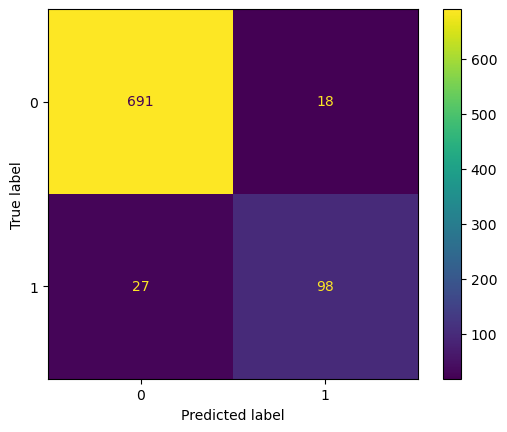

In [1910]:
ConfusionMatrixDisplay.from_estimator(best_model_dtree_SMOTE, X_test, y_test);

In [1911]:
print(classification_report(y_test, y_pred_dtree_SMOTE))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       709
           1       0.84      0.78      0.81       125

    accuracy                           0.95       834
   macro avg       0.90      0.88      0.89       834
weighted avg       0.94      0.95      0.95       834



In [1912]:
f1_score_dtree_SMOTE = f1_score(y_test, y_pred_dtree_SMOTE)
f1_score_dtree_SMOTE

0.8132780082987552

In [1913]:
accuracy_dtree_SMOTE = accuracy_score(y_test, y_pred_dtree_SMOTE)
accuracy_dtree_SMOTE

0.9460431654676259

In [1914]:
auc_score_dtree_SMOTE = roc_auc_score(y_test,y_pred_dtree_SMOTE)
auc_score_dtree_SMOTE

0.8793060648801129

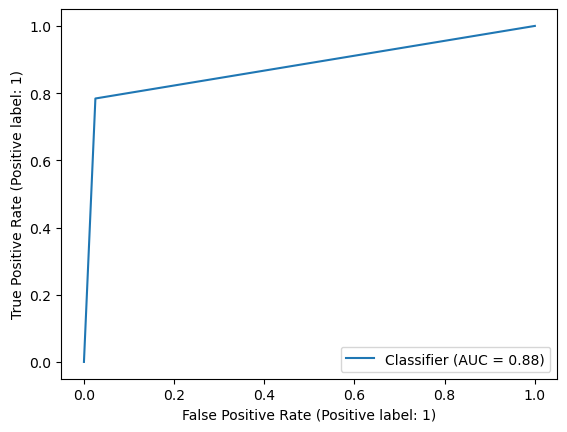

In [1915]:
RocCurveDisplay.from_predictions(y_test,y_pred_dtree_SMOTE);

In [1916]:
summary_table.loc[11] = ['Baseline_2 + Tuning + SMOTE ', 'DecisionTreeClassifier + Tuning + SMOTE', round(accuracy_dtree_SMOTE,2), round(f1_score_dtree_SMOTE,2)
                          , round(auc_score_dtree_SMOTE,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83
2,Baseline_3,KNeighborsClassifier,0.88,0.42,0.64
3,Baseline_4,RandomForestClassifier,0.94,0.83,0.86
4,Baseline_5,XGBClassifier,0.95,0.81,0.87
5,Baseline_1 + Tuning,LogisticRegression + Tuning,0.86,0.27,0.58
6,Baseline_2 + Tuning,DecisionTreeClassifier + Tuning,0.95,0.81,0.85
7,Baseline_3 + Tuning,KNeighborsClassifier + Tuning,0.89,0.42,0.64
8,Baseline_4 + Tuning,RandomForestClassifier + Tuning,0.94,0.79,0.83
9,Baseline_5 + Tuning,XGBClassifier + Tuning,0.95,0.82,0.86


In [1917]:
feat_imp_dtree_SMOTE = best_model_dtree_SMOTE['treemodel'].feature_importances_

feat_imp_dtree_SMOTE_series = pd.Series(feat_imp_dtree_SMOTE, 
          index = X_train.columns).sort_values(
    ascending = False)

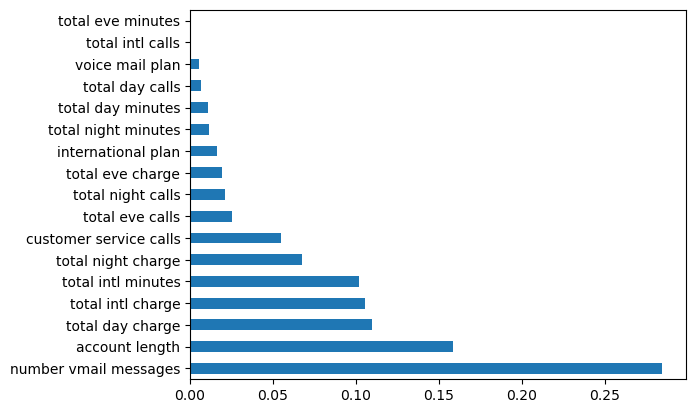

In [1918]:
feat_imp_dtree_SMOTE_series.plot(kind = 'barh');

### 3.3. KNN model + SMOTE

In [1921]:
KNN_pipe_SMOTE = Pipeline([
    ('preprocess', ct),       
    ('smote', SMOTE(random_state = 42)),
    ('knnmodel', KNeighborsClassifier())])

param_grid_KNN_SMOTE = {
    'smote__sampling_strategy': [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,'auto'],
    'knnmodel__n_neighbors': np.arange(3,10,1),
    'knnmodel__p': [1,2,3,4],
    'knnmodel__weights': ['uniform','distance'],
    'knnmodel__leaf_size': np.arange(5,20,5)
    
}

In [1922]:
tune_KNN_SMOTE = GridSearchCV(estimator=KNN_pipe_SMOTE, param_grid = param_grid_KNN_SMOTE , cv = 5)

In [1923]:
tune_KNN_SMOTE.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['customer '
                                                                          'service '
                                                                          'calls',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages']),
                                                                        ('numpipe_norm',
                                                                         Pipeline(steps=[('standscaler',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'ch...
                                                                         ['international '
                                                                          'plan',
                                                                          'voice '
                                                                          'mail '
                                                                          'plan'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('knnmodel', KNeighborsClassifier())]),
             param_grid={'knnmodel__leaf_size': array([ 5, 10, 15]),
                         'knnmodel__n_neighbors': array([3, 4, 5, 6, 7, 8, 9]),
                         'knnmodel__p': [1, 2, 3, 4],
                         'knnmodel__weights': ['uniform', 'distance'],
                         'smote__sampling_strategy': [0.2, 0.3, 0.4, 0.5, 0.6,
                                                      0.7, 0.8, 0.9, 'auto']})

In [1924]:
tune_KNN_SMOTE.best_params_

{'knnmodel__leaf_size': 5,
 'knnmodel__n_neighbors': 9,
 'knnmodel__p': 1,
 'knnmodel__weights': 'uniform',
 'smote__sampling_strategy': 0.2}

In [1925]:
tune_KNN_SMOTE.best_score_

0.8939615230460921

In [1926]:
best_model_KNN_SMOTE = tune_KNN_SMOTE.best_estimator_
best_model_KNN_SMOTE

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve c...
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.2)),
                ('knnmodel',
                 KNeighborsClassifier(leaf_size=5, n_neighbors=9, p=1))])

#### Evaluate the model with X_test

In [1927]:
y_pred_KNN_SMOTE = best_model_KNN_SMOTE.predict(X_test)

In [1928]:
confusion_matrix(y_test,y_pred_KNN_SMOTE)

array([[705,   4],
       [ 82,  43]])

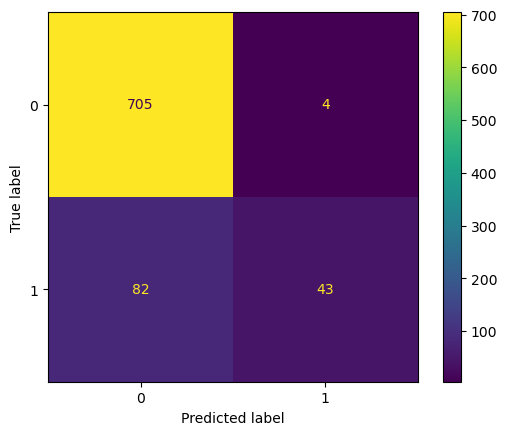

In [1929]:
ConfusionMatrixDisplay.from_estimator(best_model_KNN_SMOTE, X_test, y_test);

In [1930]:
print(classification_report(y_test, y_pred_KNN_SMOTE))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       709
           1       0.91      0.34      0.50       125

    accuracy                           0.90       834
   macro avg       0.91      0.67      0.72       834
weighted avg       0.90      0.90      0.88       834



In [1936]:
f1_score_KNN_SMOTE = f1_score(y_test, y_pred_KNN_SMOTE)
f1_score_KNN_SMOTE

0.5

In [1937]:
accuracy_KNN_SMOTE = accuracy_score(y_test, y_pred_KNN_SMOTE)
accuracy_KNN_SMOTE

0.8968824940047961

In [1938]:
auc_score_KNN_SMOTE = roc_auc_score(y_test,y_pred_KNN_SMOTE)
auc_score_KNN_SMOTE

0.6691791255289139

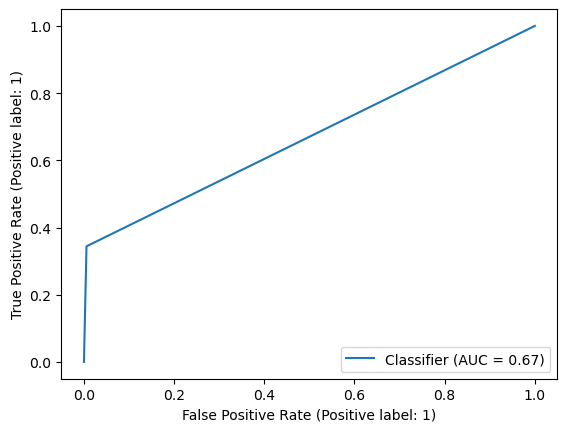

In [1939]:
RocCurveDisplay.from_predictions(y_test,y_pred_KNN_SMOTE);

In [1940]:
summary_table.loc[12] = ['Baseline_3 + Tuning + SMOTE ', 'KNeighborsClassifier + Tuning + SMOTE', round(accuracy_KNN_SMOTE,2), round(f1_score_KNN_SMOTE,2)
                          , round(auc_score_KNN_SMOTE,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83
2,Baseline_3,KNeighborsClassifier,0.88,0.42,0.64
3,Baseline_4,RandomForestClassifier,0.94,0.83,0.86
4,Baseline_5,XGBClassifier,0.95,0.81,0.87
5,Baseline_1 + Tuning,LogisticRegression + Tuning,0.86,0.27,0.58
6,Baseline_2 + Tuning,DecisionTreeClassifier + Tuning,0.95,0.81,0.85
7,Baseline_3 + Tuning,KNeighborsClassifier + Tuning,0.89,0.42,0.64
8,Baseline_4 + Tuning,RandomForestClassifier + Tuning,0.94,0.79,0.83
9,Baseline_5 + Tuning,XGBClassifier + Tuning,0.95,0.82,0.86


### 3.4. RandomForestClassifier + SMOTE

In [2049]:
rforest_pipe_SMOTE = Pipeline([
    ('preprocess', ct),       
    ('smote', SMOTE(random_state = 42)),
    ('forestmodel',RandomForestClassifier(n_estimators = 100))])

param_grid_rforest_SMOTE = {
    'smote__sampling_strategy': np.arange(0.2,0.5,0.01),
    'forestmodel__criterion': ['gini'],
#     'forestmodel__max_depth': np.arange(3,9,1),
#     'forestmodel__min_samples_split': np.arange(3,11,1)
}

In [2050]:
tune_rforest_SMOTE = GridSearchCV(estimator=rforest_pipe_SMOTE, param_grid = param_grid_rforest_SMOTE , cv = 5)

In [2051]:
tune_rforest_SMOTE.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['customer '
                                                                          'service '
                                                                          'calls',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages']),
                                                                        ('numpipe_norm',
                                                                         Pipeline(steps=[('standscaler',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'ch...
                                                                         ['international '
                                                                          'plan',
                                                                          'voice '
                                                                          'mail '
                                                                          'plan'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('forestmodel',
                                        RandomForestClassifier())]),
             param_grid={'forestmodel__criterion': ['gini'],
                         'smote__sampling_strategy': array([0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
       0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41,
       0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49])})

In [2052]:
tune_rforest_SMOTE.best_params_

{'forestmodel__criterion': 'gini',
 'smote__sampling_strategy': 0.23000000000000004}

In [2054]:
tune_rforest_SMOTE.best_score_

0.9555855711422845

In [2055]:
best_model_rforest_SMOTE = tune_rforest_SMOTE.best_estimator_
best_model_rforest_SMOTE

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve c...
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge']),
                                                 ('ordipipe',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder()),
                                                                  ('standscaler',
                                                                   StandardScaler())]),
                                                  ['international plan',
                                                   'voice mail plan'])])),
                ('smote',
                 SMOTE(random_state=42, sampling_strategy=0.23000000000000004)),
                ('forestmodel', RandomForestClassifier())])

#### Evaluate the model with X_test

In [2056]:
y_pred_rforest_SMOTE = best_model_rforest_SMOTE.predict(X_test)

In [2057]:
confusion_matrix(y_test,y_pred_rforest_SMOTE)

array([[704,   5],
       [ 32,  93]])

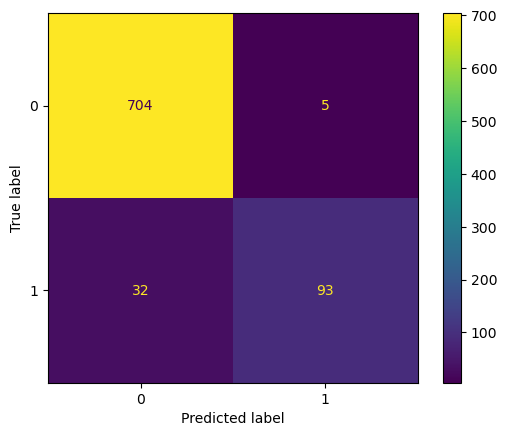

In [2058]:
ConfusionMatrixDisplay.from_estimator(best_model_rforest_SMOTE, X_test, y_test);

In [2059]:
print(classification_report(y_test, y_pred_rforest_SMOTE))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       709
           1       0.95      0.74      0.83       125

    accuracy                           0.96       834
   macro avg       0.95      0.87      0.90       834
weighted avg       0.96      0.96      0.95       834



In [2060]:
f1_score_rforest_SMOTE = f1_score(y_test, y_pred_rforest_SMOTE)
f1_score_rforest_SMOTE

0.8340807174887892

In [2061]:
accuracy_rforest_SMOTE = accuracy_score(y_test, y_pred_rforest_SMOTE)
accuracy_rforest_SMOTE

0.9556354916067147

In [2062]:
auc_score_rforest_SMOTE = roc_auc_score(y_test,y_pred_rforest_SMOTE)
auc_score_rforest_SMOTE

0.8684739069111425

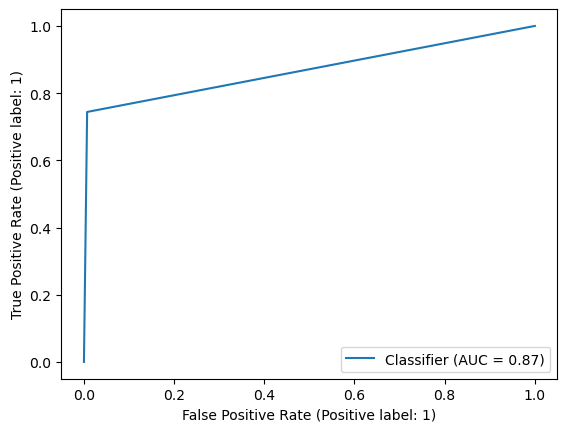

In [2063]:
RocCurveDisplay.from_predictions(y_test,y_pred_rforest_SMOTE);

In [2064]:
summary_table.loc[13] = ['Baseline_4 + Tuning + SMOTE ', 'RandomForestClassifier + Tuning + SMOTE', round(accuracy_rforest_SMOTE,2), round(f1_score_rforest_SMOTE,2)
                          , round(auc_score_rforest_SMOTE,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83
2,Baseline_3,KNeighborsClassifier,0.88,0.42,0.64
3,Baseline_4,RandomForestClassifier,0.94,0.83,0.86
4,Baseline_5,XGBClassifier,0.95,0.81,0.87
5,Baseline_1 + Tuning,LogisticRegression + Tuning,0.86,0.27,0.58
6,Baseline_2 + Tuning,DecisionTreeClassifier + Tuning,0.95,0.81,0.85
7,Baseline_3 + Tuning,KNeighborsClassifier + Tuning,0.89,0.42,0.64
8,Baseline_4 + Tuning,RandomForestClassifier + Tuning,0.94,0.79,0.83
9,Baseline_5 + Tuning,XGBClassifier + Tuning,0.95,0.82,0.86


In [2065]:
feat_imp_rforest_SMOTE = best_model_rforest_SMOTE['forestmodel'].feature_importances_

feat_imp_rforest_SMOTE_series = pd.Series(feat_imp_rforest_SMOTE, 
          index = X_train.columns).sort_values(
    ascending = False)

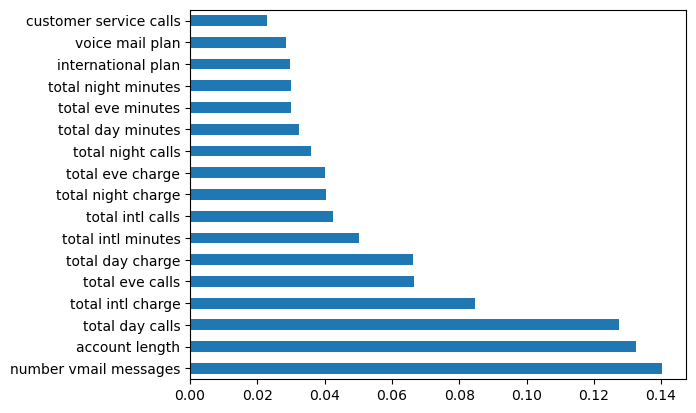

In [2066]:
feat_imp_rforest_SMOTE_series.plot(kind = 'barh');

### 3.5. XGBoosting + SMOTE

In [2086]:
XGBoost_pipe_SMOTE = Pipeline([
    ('preprocess', ct),       
    ('smote', SMOTE(random_state = 42)),
    ('XGBoostmodel',XGBClassifier())])

param_grid_XGBoost_SMOTE = {
    'XGBoostmodel__n_estimators': [500],
    'XGBoostmodel__learning_rate': np.arange(0.05,0.2,0.01),
    'XGBoostmodel__gamma': [5],
    'XGBoostmodel__colsample_bytree': [.5],
    'smote__sampling_strategy': np.arange(0.2,0.4,0.01)
}

In [2087]:
tune_XGBoost_SMOTE = GridSearchCV(estimator=XGBoost_pipe_SMOTE, param_grid = param_grid_XGBoost_SMOTE , cv = 5)

In [2088]:
tune_XGBoost_SMOTE.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['customer '
                                                                          'service '
                                                                          'calls',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages']),
                                                                        ('numpipe_norm',
                                                                         Pipeline(steps=[('standscaler',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'ch...
             param_grid={'XGBoostmodel__colsample_bytree': [0.5],
                         'XGBoostmodel__gamma': [5],
                         'XGBoostmodel__learning_rate': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 ]),
                         'XGBoostmodel__n_estimators': [500],
                         'smote__sampling_strategy': array([0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
       0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39])})

In [2089]:
tune_XGBoost_SMOTE.best_params_

{'XGBoostmodel__colsample_bytree': 0.5,
 'XGBoostmodel__gamma': 5,
 'XGBoostmodel__learning_rate': 0.09000000000000001,
 'XGBoostmodel__n_estimators': 500,
 'smote__sampling_strategy': 0.23000000000000004}

In [2090]:
tune_XGBoost_SMOTE.best_score_

0.9587871743486973

In [2091]:
best_model_XGBoost_SMOTE = tune_XGBoost_SMOTE.best_estimator_
best_model_XGBoost_SMOTE

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['customer service calls',
                                                   'number vmail messages']),
                                                 ('numpipe_norm',
                                                  Pipeline(steps=[('standscaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve c...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.09000000000000001, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=500, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, ...))])

#### Evaluate the model with X_test

In [2092]:
y_pred_XGBoost_SMOTE = best_model_XGBoost_SMOTE.predict(X_test)

In [2093]:
confusion_matrix(y_test,y_pred_XGBoost_SMOTE)

array([[704,   5],
       [ 32,  93]])

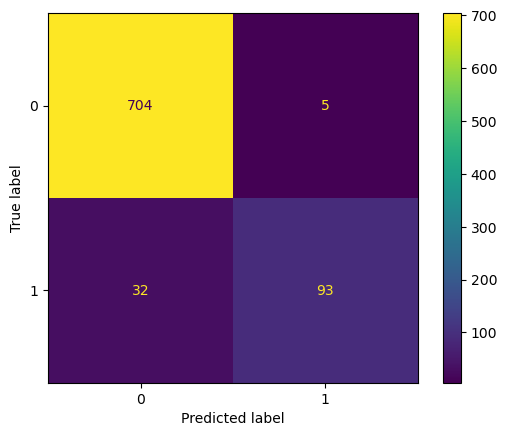

In [2111]:
ConfusionMatrixDisplay.from_estimator(best_model_XGBoost_SMOTE, X_test, y_test);

In [2095]:
print(classification_report(y_test, y_pred_XGBoost_SMOTE))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       709
           1       0.95      0.74      0.83       125

    accuracy                           0.96       834
   macro avg       0.95      0.87      0.90       834
weighted avg       0.96      0.96      0.95       834



In [2096]:
f1_score_XGBoost_SMOTE = f1_score(y_test, y_pred_XGBoost_SMOTE)
f1_score_XGBoost_SMOTE

0.8340807174887892

In [2097]:
accuracy_XGBoost_SMOTE = accuracy_score(y_test, y_pred_XGBoost_SMOTE)
accuracy_XGBoost_SMOTE

0.9556354916067147

In [2098]:
precision_XGBoost_SMOTE = precision_score(y_test, y_pred_XGBoost_SMOTE)
precision_XGBoost_SMOTE

0.9489795918367347

In [2099]:
recall_XGBoost_SMOTE = recall_score(y_test, y_pred_XGBoost_SMOTE)
recall_XGBoost_SMOTE

0.744

In [2100]:
auc_score_XGBoost_SMOTE = roc_auc_score(y_test,y_pred_XGBoost_SMOTE)
auc_score_XGBoost_SMOTE

0.8684739069111425

In [2101]:
y_prob_XGBoost_SMOTE = best_model_XGBoost_SMOTE.predict_proba(X_test)
y_prob[:,1].mean()

0.140360456924961

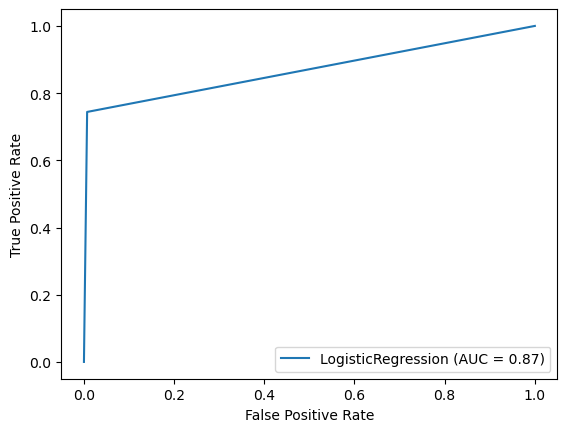

In [2102]:
fpr_XGBoost_SMOTE, tpr_XGBoost_SMOTE, thresholds_XGBoost_SMOTE = roc_curve(y_test, y_pred_XGBoost_SMOTE)
auc_score_XGBoost_SMOTE = metrics.auc(fpr_XGBoost_SMOTE, tpr_XGBoost_SMOTE)
display_XGBoost_SMOTE = metrics.RocCurveDisplay(fpr=fpr_XGBoost_SMOTE, tpr=tpr_XGBoost_SMOTE, roc_auc=auc_score_XGBoost_SMOTE,
                                   estimator_name='LogisticRegression')
display_XGBoost_SMOTE.plot()
plt.show()

In [2103]:
summary_table.loc[14] = ['Baseline_5 + Tuning + SMOTE ', 'XGBClassifier + Tuning + SMOTE', round(accuracy_XGBoost_SMOTE,2), round(f1_score_XGBoost_SMOTE,2)
                          , round(auc_score_XGBoost_SMOTE,2) ]

summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83
2,Baseline_3,KNeighborsClassifier,0.88,0.42,0.64
3,Baseline_4,RandomForestClassifier,0.94,0.83,0.86
4,Baseline_5,XGBClassifier,0.95,0.81,0.87
5,Baseline_1 + Tuning,LogisticRegression + Tuning,0.86,0.27,0.58
6,Baseline_2 + Tuning,DecisionTreeClassifier + Tuning,0.95,0.81,0.85
7,Baseline_3 + Tuning,KNeighborsClassifier + Tuning,0.89,0.42,0.64
8,Baseline_4 + Tuning,RandomForestClassifier + Tuning,0.94,0.79,0.83
9,Baseline_5 + Tuning,XGBClassifier + Tuning,0.95,0.82,0.86


In [2085]:
feat_imp_XGBoost_SMOTE = best_model_XGBoost_SMOTE['XGBoostmodel'].feature_importances_

feat_imp_XGBoost_SMOTE_series = pd.Series(feat_imp_XGBoost_SMOTE, 
          index = X_train.columns).sort_values(
    ascending = False)

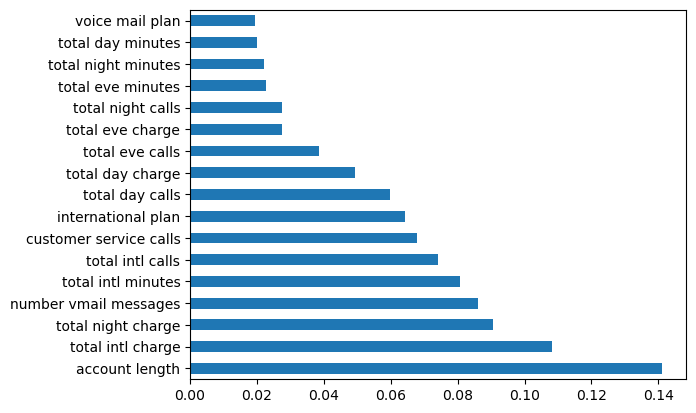

In [2029]:
feat_imp_XGBoost_series.plot(kind = 'barh');

## Model evaluation

In [2104]:
summary_table

,Model,Classifier,Test_Accuracy,Test_F1_score,AUC
0,Baseline_1,LogisticRegression,0.86,0.27,0.58
1,Baseline_2,DecisionTreeClassifier,0.91,0.70,0.83
2,Baseline_3,KNeighborsClassifier,0.88,0.42,0.64
3,Baseline_4,RandomForestClassifier,0.94,0.83,0.86
4,Baseline_5,XGBClassifier,0.95,0.81,0.87
5,Baseline_1 + Tuning,LogisticRegression + Tuning,0.86,0.27,0.58
6,Baseline_2 + Tuning,DecisionTreeClassifier + Tuning,0.95,0.81,0.85
7,Baseline_3 + Tuning,KNeighborsClassifier + Tuning,0.89,0.42,0.64
8,Baseline_4 + Tuning,RandomForestClassifier + Tuning,0.94,0.79,0.83
9,Baseline_5 + Tuning,XGBClassifier + Tuning,0.95,0.82,0.86


Among the five classifiers that were used, RandomForestClassifier and XGBClassifier performed the best after applying hyperparameter tuning and utilizing the SMOTE technique to enhance the model's accuracy. Both classifiers exhibited similar levels of accuracy, f1-score, and AUC score, indicating their comparable performance.

Looking at both confusion matrices:

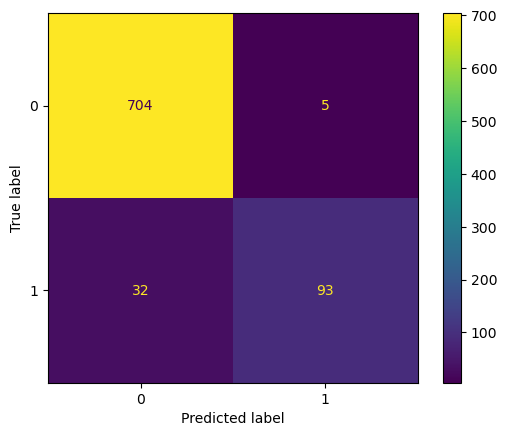

In [2113]:
#XGBoost best model
ConfusionMatrixDisplay.from_estimator(best_model_XGBoost_SMOTE, X_test, y_test);